<h1>UK Road Accidents Data Analysis</h1>
<hr>
<h2>Data Analyst: Kim Andrei D. Lugatoc</h2>

<h2>Import Libraries</h2>

In [84]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

<h2>Load dataset</h2>

In [85]:
accidents = pd.read_csv('datasets\\uk_road_accident.csv')
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h3>Checking for Null Values</h3>

In [86]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [87]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mean())
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mean())
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('unaccounted')
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna(accidents['Weather_Conditions'].mode()[0])

accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>Clearing inconsistencies with the Data Set</h3>

In [88]:
accidents['Accident Date'] = accidents['Accident Date'].str.strip()
accidents['Accident Date'] = accidents['Accident Date'].astype('str')
accidents['Accident Date'] = accidents['Accident Date'].str.replace('/', '-')

In [89]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst= True, errors= 'coerce')

<h3>Changing to data types to category</h3>

In [90]:
accidents.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h3>Categorical Data Fields</h3>

In [91]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

# check for changes
accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h3>Making the date information as part of the dataset so we can extract data information</h3>

In [92]:
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.dayofweek #MONDAY=0 #SUNDAY=6

accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h1>Questions</h1>

<h3>1. How many accidents are recorded in the dataset?</h3>

In [93]:
accidents['Index'].count()

np.int64(660679)

<h3>Insight 1: As shown above, There are 660,679 record accidents in this dataset.</h3>

<h3>2. What is the most common accident severity?</h3>

In [94]:
accidents['Accident_Severity'].mode()

0    Slight
Name: Accident_Severity, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

<h3>Insight 2: As shown above, The most common accident severity is "Slight"</h3>

<h3>3. What is the most common road surface condition during accidents?</h3>

In [95]:
accidents['Road_Surface_Conditions'].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: category
Categories (6, object): ['Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp', 'unaccounted']

<h3>Insight 3: The most common road surface condition during accidents is Dry. This suggests that accidents don’t only happen in bad weather, even normal road conditions can be risky.</h3>

<h3>4. What are the most common vehicle types involved in accidents?</h3>

In [96]:
vehicle_counts = accidents.groupby('Vehicle_Type')['Index'].count()
vehicle_counts

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
Name: Index, dtype: int64

<h3>Insight 4: The most common vehicle type involved in accidents is obviously Cars, while Cars are the most common type, the other types such as Motorcycles over 500, Motorcycles 125cc and under, Taxi/Private cars and Buses are also frequently recorded.</h3>

<h3>5. How many accidents happened in Urban vs Rural areas?)</h3>

In [97]:
urban_rural = accidents.groupby('Urban_or_Rural_Area')['Index'].count()
urban_rural

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
Name: Index, dtype: int64

<h3>Insight 5: As shown above, The Urban area have 421,678 total accidents, while Rural area have 238,990 total accidents. Obviously, most accidents occur in the Urban areas compared to Rural ones.</h3>

<h3>6. How many accidents happened in Urban vs Rural areas?)</h3>

In [98]:
accidents.groupby('District Area')['Index'].count().nlargest(10)

District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: Index, dtype: int64

<h3>Insight 6: Birmingham had the most accidents with 13,491 recorded accident, which is way higher compared to Leeds and Manchester.</h3>
<h3>Insight 7: Most of the top districts are big cities, so it makes sense because there are more cars, more people, and heavier traffic, meaning accidents are more likely to happen there.</h3>

<h3>7. Which road surface condition has the highest number of accidents?</h3>

In [99]:
accidents.groupby('Road_Surface_Conditions')['Index'].count()

Road_Surface_Conditions
Dry                     447821
Flood over 3cm. deep      1017
Frost or ice             18517
Snow                      5890
Wet or damp             186708
unaccounted                726
Name: Index, dtype: int64

<h3>Insight 8: Most accidents happen on Dry roads, showing that accidents aren’t only caused by bad weather but also by driver behavior.</h3>

<h3>8. How many accidents happened under different light conditions</h3>

In [100]:
accidents.groupby('Light_Conditions').size()

Light_Conditions
Darkness - lighting unknown      6484
Darkness - lights lit          129335
Darkness - lights unlit          2543
Darkness - no lighting          37437
Daylight                       484880
dtype: int64

<h3>Insight 9: The most accidents happen in daylight, which may be due to higher traffic volumes during the day rather than poor visibility at night.</h3>

<h3>9. What is the most common weather condition during accidents?</h3>

In [101]:
accidents.groupby('Weather_Conditions')['Index'].count()

Weather_Conditions
Fine + high winds          8554
Fine no high winds       535013
Fog or mist                3528
Other                     17150
Raining + high winds       9615
Raining no high winds     79696
Snowing + high winds        885
Snowing no high winds      6238
Name: Index, dtype: int64

<h3>Insight 10: The most common weather condition of accidents happen in fine weather with no high winds with over 500,000 recorded. This shows that good weather does not guarantee safety, accidents are more strongly linked to traffic and driver behavior than to poor weather.</h3>
<h3>Insight 11: Next to the most common weather condition is Raining no high winds. This highlights the added risk of reduced visibility and slippery roads.</h3>

<h3>10. What is the average number of casualties per accident?</h3>

In [102]:
accidents['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h3>Insight 12: On average, each accident involves about 1–2 casualties, showing that while most accidents result in few casualties, the numbers add up significantly across all incidents.</h3>

<h3>11. What is the average number of vehicles involved in accidents across all records?</h3>

In [103]:
accidents['Number_of_Vehicles'].mean()

np.float64(1.8312554205597575)

<h3>Insight 13: On average, each accident involves about 1–2 casualties, showing that while most accidents result in few casualties, the numbers add up significantly across all incidents.</h3>

<h3>12. Which year had the most reported accidents?</h3>

In [104]:
accidents.groupby('Year')['Index'].count()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: Index, dtype: int64

<h3>Insight 14: 2019 had the highest reported accidents (182,115), meaning road safety issues were most critical before the pandemic.</h3>
<h3>Insight 15: Accidents decreased in 2020 (170,591). Likely influenced by COVID-19 lockdowns</h3>
<h3>Insight 16: 2021 continued the downward trend (163,554), showing that even with partial reopening, road usage was still lower than pre-pandemic.</h3>
<h3>Insight 17: A2022 recorded the lowest accidents (144,419), which could indicate lasting effects of pandemic lifestyle changes or improved safety measures.</h3>

<h3>13. Which month across all years recorded the highest number of accidents?</h3>

In [105]:
accidents.groupby('Month')['Index'].count()

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: Index, dtype: int64

<h3>Insight 18: November (60,424 accidents) recorded the highest number of accidents. This could be linked to seasonal changes such as early winter conditions, shorter daylight hours, or increased traffic due to holiday preparations.</h3>

<h3>Insight 19: February (49,491 accidents) had the lowest number of accidents. This might be because of reduced travel after the holiday season or colder weather discouraging long-distance trips.</h3>

<h3>13. Which day of the week had the most reported accidents?</h3>

In [106]:
accidents.groupby('DayOfWeek')['Index'].count() # MONDAY = 0, SUNDAY = 6

DayOfWeek
0     72680
1     94550
2     99558
3     99511
4     97900
5    107178
6     89302
Name: Index, dtype: int64

<h3>Insight 20: Saturday (5) recorded the highest number of accidents with 107,178 cases. This suggests that weekends, when more people may be traveling for leisure, social activities, or long drives, are riskier times on the road.</h3>

<h3>Insight 21: Monday (0) had the lowest number of accidents with 72,680 cases. This could mean that at the start of the work week, people may be more cautious, or traffic patterns are more predictable compared to weekends.</h3>

<h1>Seasonal Analysis</h3>

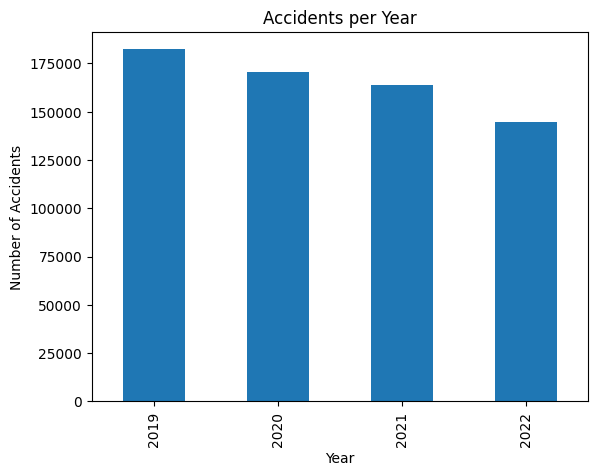

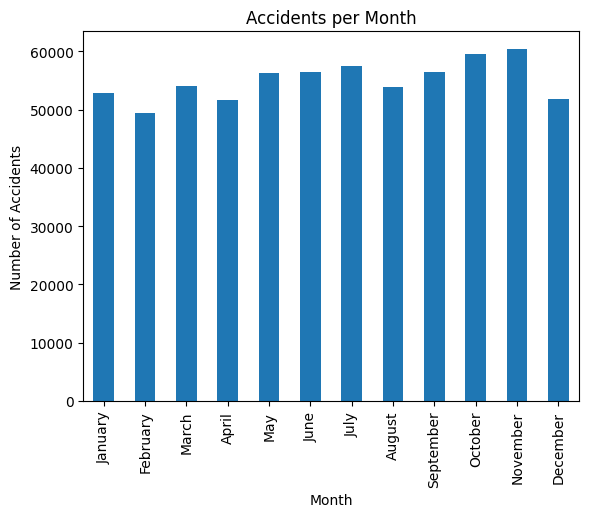

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


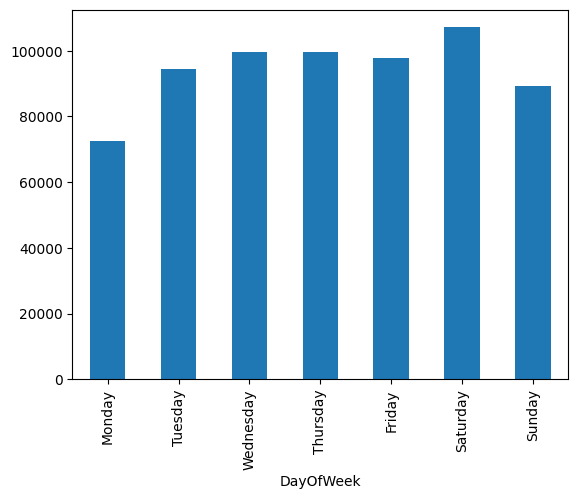

In [107]:
# Accidents per year
accidents_per_year = accidents['Year'].value_counts().sort_index()
accidents_per_month = accidents['Month'].value_counts().sort_index()
accidents_per_day = accidents['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

#dictionary
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Using District Area to make a comparison to a general result </h1>
<hr>
<h3>1. Kensington and Chelsea Analysis</h3>
<img src = 'https://s3.amazonaws.com/fathom_media/photos/London-Kensington-houses.jpg'\>

In [108]:
# df.dtypes
kensington_chelsea_df = accidents[accidents['District Area'] == 'Kensington and Chelsea']

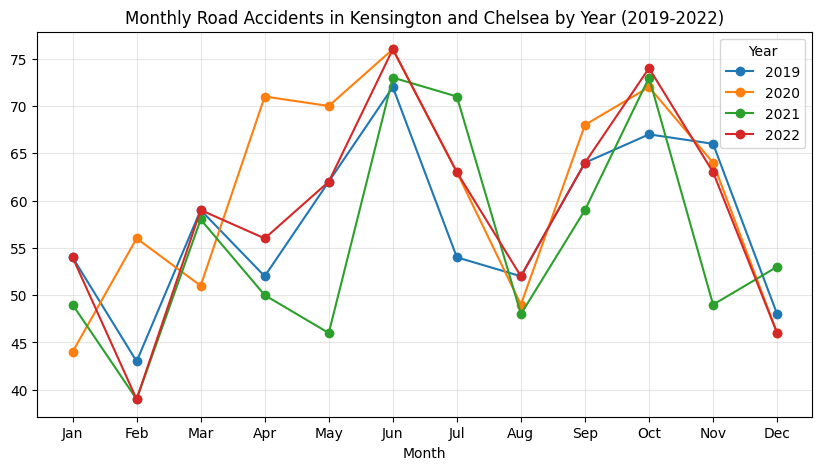

In [109]:
monthly_kensington_chelsea = kensington_chelsea_df.groupby(['Year', 'Month']).size()

monthly_kensington_chelsea = monthly_kensington_chelsea.unstack(level=0)

monthly_kensington_chelsea.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Kensington and Chelsea by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3>Insight 22: February had the lowest number of road accidents across multiple years, dropping to around 39 cases in 2020 and 2022. This could be due to shorter days, colder weather, or fewer vehicles on the road during winter.</h3>

<h3>Insight 23: June consistently recorded the highest number of accidents across all years, with 2022 peaking at 76 accidents. This suggests that summer months bring increased road usage, possibly due to travel, events, or holidays.</h3>

<h3>Insight 24: October also showed high accident numbers (above 70 in 2021 and 2022), making it another peak accident month. This might be linked to seasonal changes, heavier traffic, or return-to-school/work routines.</h3>

<h3>Insight 25: August showed one of the lowest accident counts, especially in 2021 (around 47 accidents). This could indicate fewer vehicles on the road due to vacations or reduced traffic activity.</h3>

<h3>Insight 26: 2020 showed a sharp rise in accidents from April to June, despite lockdown measures earlier in the year. This suggests that when restrictions were eased, there was a sudden surge in traffic that led to more accidents.</h3>

In [110]:
locations = list(zip(kensington_chelsea_df['Latitude'], kensington_chelsea_df['Longitude']))

m = folium.Map(location=[kensington_chelsea_df['Latitude'].mean(), kensington_chelsea_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<h3>2. Manchester Analysis</h3>
<img src = 'https://images.adsttc.com/media/images/5459/d024/e58e/ce51/8700/00e2/large_jpg/Manchester_town_hall.jpg?1415172113'\>

In [125]:
manchester_df = accidents[accidents['District Area'] == 'Manchester']

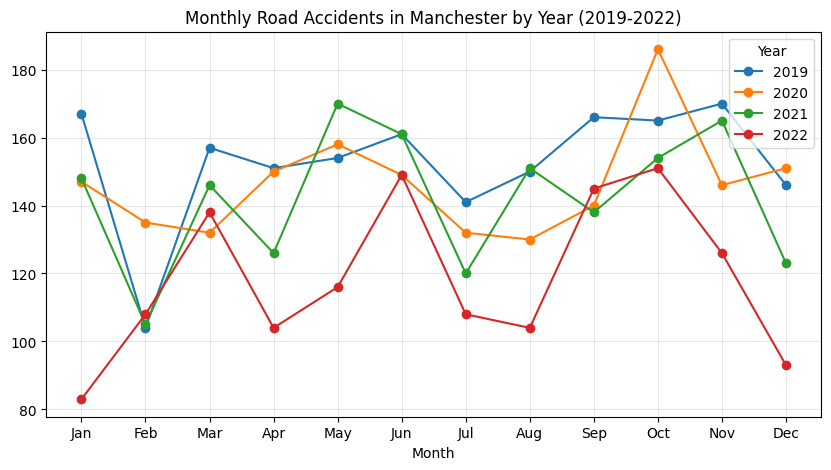

In [126]:
monthly_manchester = manchester_df.groupby(['Year', 'Month']).size()

monthly_manchester = monthly_manchester.unstack(level=0)

monthly_manchester.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Manchester by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3>Insight 27: October 2020 recorded the highest spike with around 186 accidents, suggesting that this month was particularly risky compared to other years and months. This may be linked to seasonal traffic patterns or post-lockdown activity.</h3>

<h3>Insight 28: February consistently showed one of the lowest accident counts across years (around 105–110), indicating that winter months might reduce traffic flow and accident risks.</h3>

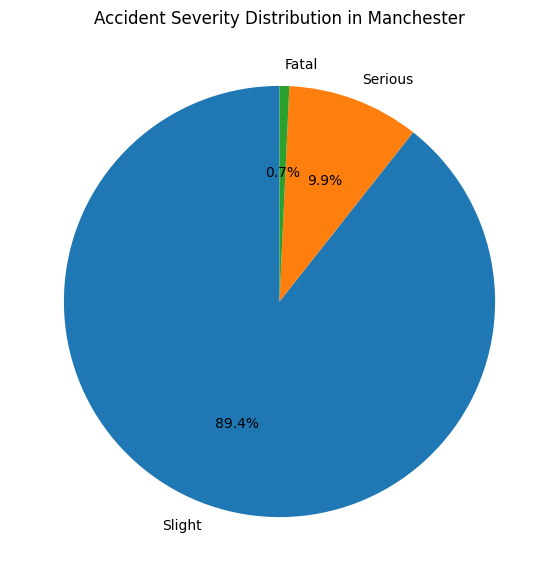

In [127]:
severity_manchester = manchester_df['Accident_Severity'].value_counts()

plt.pie(severity_manchester,
        labels = severity_manchester.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Manchester')
plt.show()

<h3>Insight 29: The vast majority of accidents (89.4%) were classified as slight, showing that while accidents are frequent, most are not life-threatening.</h3>

<h3>Insight 30: Fatal accidents accounted for only 0.7%, while serious accidents made up 9.9%, highlighting that although rare, these severe cases still pose significant safety concerns.</h3>

In [128]:
locations = list(zip(manchester_df['Latitude'], manchester_df['Longitude']))

m = folium.Map(location=[manchester_df['Latitude'].mean(), manchester_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<h3>3. Liverpool Analysis</h3>
<img src = 'https://www.discoverbritain.com/_gatsby/file/93ab30fd05e9c5b99b1dfa1ba3da01a4/21417_D2R06P-1024x718.jpg'\>

In [114]:
liverpool_df = accidents[accidents['District Area'] == 'Liverpool']

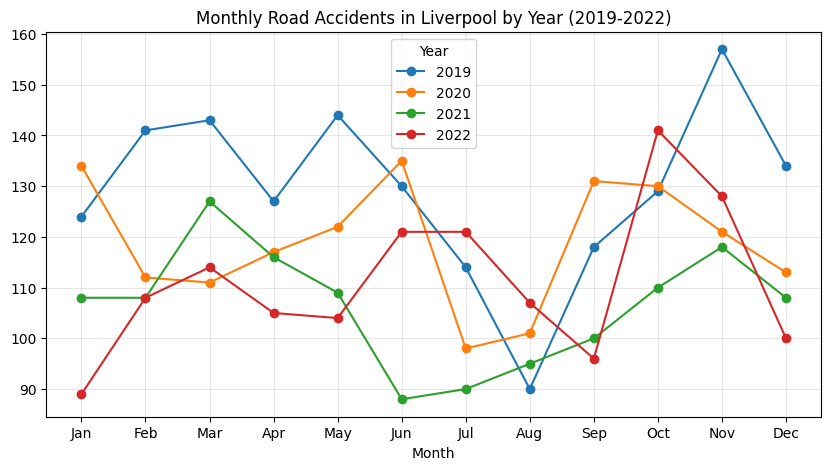

In [123]:
monthly_liverpool = liverpool_df.groupby(['Year', 'Month']).size()

monthly_liverpool = monthly_liverpool.unstack(level=0)

monthly_liverpool.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Liverpool by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

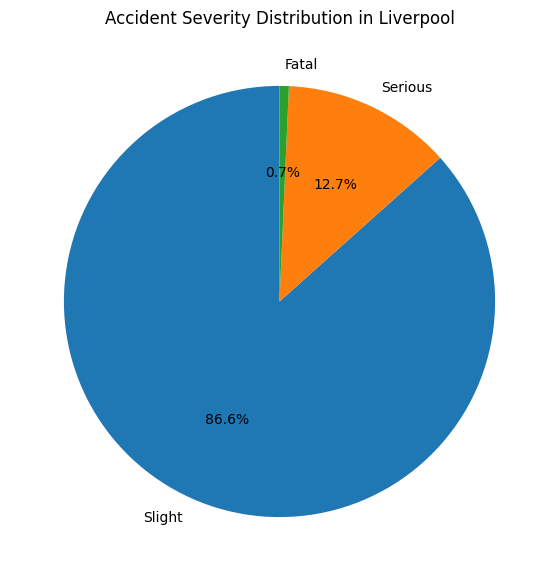

In [124]:
severity_liverpool = liverpool_df['Accident_Severity'].value_counts()

plt.pie(severity_liverpool,
        labels = severity_liverpool.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Liverpool')
plt.show()

<h3>Insight 31: A large majority (86.6%) of accidents in Liverpool are classified as slight, meaning most road incidents are relatively minor and do not cause major injuries..</h3>

<h3>Insight 32: Serious accidents make up 12.7%, which is higher than in Manchester (9.9%), suggesting that while Liverpool has many slight cases, it experiences a larger share of severe accidents. Fatal cases remain very rare at 0.7%.</h3>

In [116]:
locations = list(zip(liverpool_df['Latitude'], liverpool_df['Longitude']))

m = folium.Map(location=[liverpool_df['Latitude'].mean(), liverpool_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<h3>4. Oxford Analysis</h3>
<img src = 'https://cdn.britannica.com/03/117103-050-F4C2FC83/view-University-of-Oxford-England-Oxfordshire.jpg'\>

In [117]:
oxford_df = accidents[accidents['District Area'] == 'Oxford']

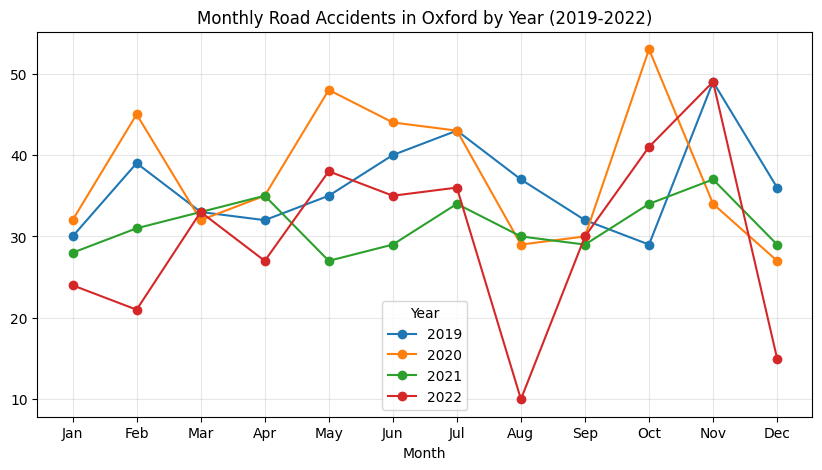

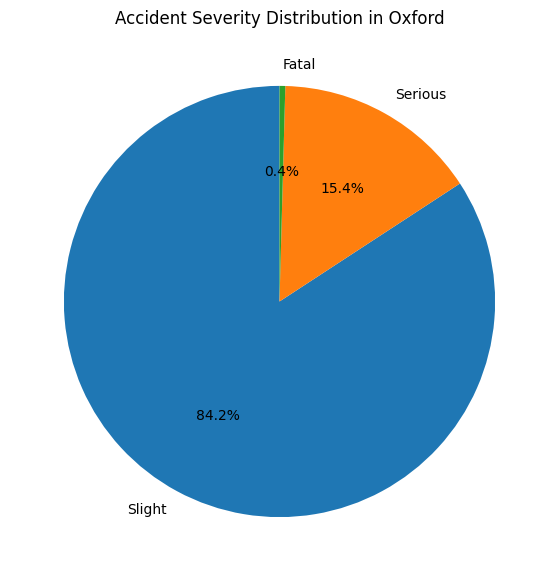

In [118]:
monthly_oxford = oxford_df.groupby(['Year', 'Month']).size()

monthly_oxford = monthly_oxford.unstack(level=0)

monthly_oxford.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Oxford by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

severity_oxford = oxford_df['Accident_Severity'].value_counts()

plt.pie(severity_oxford,
        labels = severity_oxford.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Oxford')
plt.show()

In [39]:
locations = list(zip(oxford_df['Latitude'], oxford_df['Longitude']))

m = folium.Map(location=[oxford_df['Latitude'].mean(), oxford_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<h3>5. Westminster Analysis</h3>
<img src = 'https://www.visitlondon.com/-/media/images/london/visit/things-to-do/london-areas/westminster/westminster-abbey-640x360.jpg?mw=800&rev=20821930b36d43adaf4c5ae5db4ee1b1&hash=0E960A827DEEE2E42905FEF10B56B030'\>

In [40]:
westminster_df = accidents[accidents['District Area'] == 'Westminster']

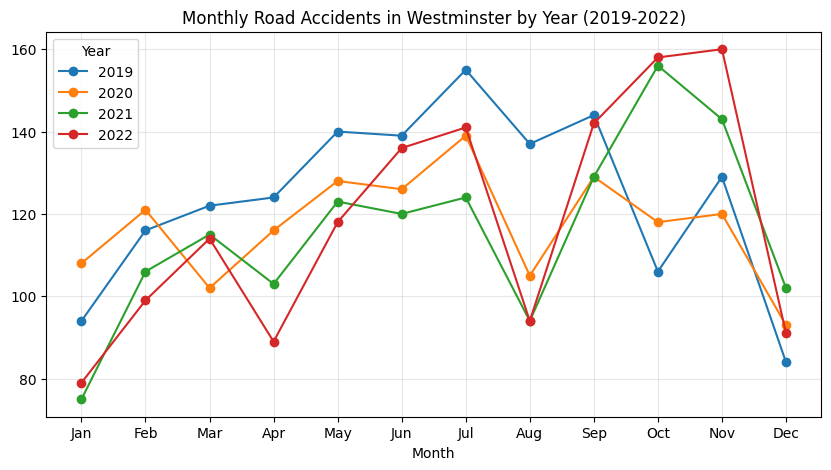

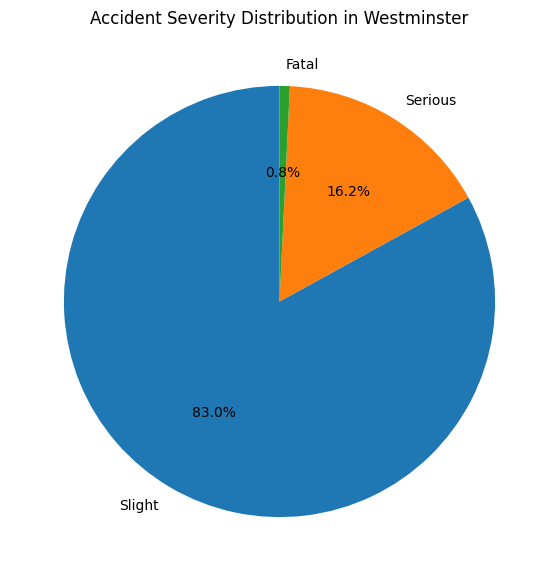

In [72]:
monthly_westminster = westminster_df.groupby(['Year', 'Month']).size()

monthly_westminster = monthly_westminster.unstack(level=0)

monthly_westminster.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Westminster by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

severity_westminster  = westminster_df['Accident_Severity'].value_counts()

plt.pie(severity_westminster,
        labels = severity_westminster.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Westminster')
plt.show()

In [42]:
locations = list(zip(westminster_df['Latitude'], westminster_df['Longitude']))

m = folium.Map(location=[westminster_df['Latitude'].mean(), westminster_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<h3>6. Birmingham Analysis</h3>
<img src = 'https://www.thetrainline.com/cms/media/9559/uk-birmingham-city-centre-aerial.jpg'\>

In [129]:
birmingham_df = accidents[accidents['District Area'] == 'Birmingham']

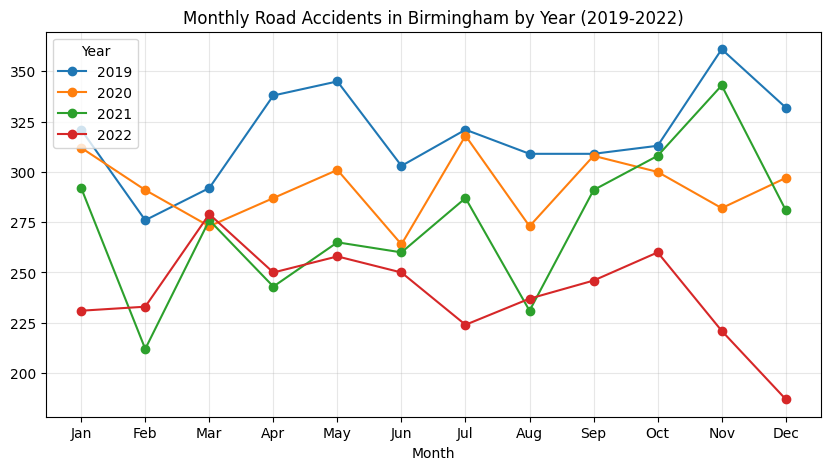

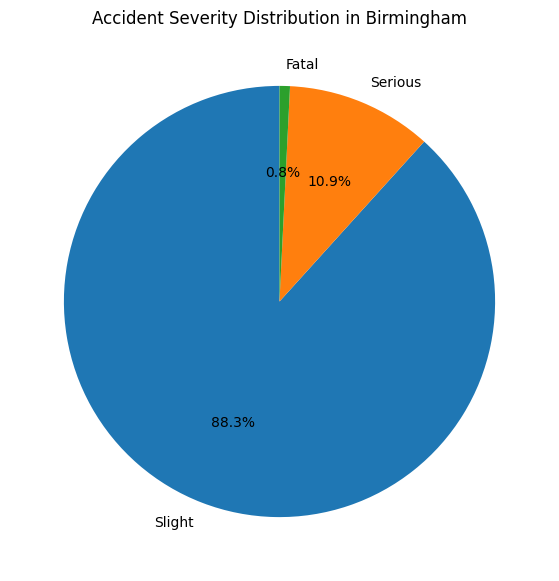

In [130]:
monthly_birmingham = birmingham_df.groupby(['Year', 'Month']).size()

monthly_birmingham = monthly_birmingham.unstack(level=0)

monthly_birmingham.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Birmingham by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

severity_birmingham  = birmingham_df['Accident_Severity'].value_counts()

plt.pie(severity_birmingham,
        labels = severity_birmingham.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution in Birmingham')
plt.show()

In [131]:
locations = list(zip(birmingham_df['Latitude'], birmingham_df['Longitude']))

m = folium.Map(location=[birmingham_df['Latitude'].mean(), birmingham_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m